Assignment 2 (due on 11/8)

学生：曾连荣 (12332314)

批改人：Zhao Shuhui

得分：36/50

=========================================
# 1 Significant Earthquakes
13/25  
1.1 计算每个国家从BC2150开始的地震死亡人数，并输出最多的10个国家，附上相应人数——完成了排序操作；没有根据国家对数据进行分组和展示  1/5  

1.2 计算每年全世界震级大于6.0的地震数量，并画出时间序列，在报告中陈述是否有趋势以及理由——完成了筛选工作；时间序列绘画失误，注意数量为0的年份  7/10  

1.3 创建CountEq_LargestEq方法，要求方法返回 1）给定国家从BC2150开始的地震数量；2）该国家最严重地震的发生日期。对数据集中的所有国家使用该方法，将得到的结果按地震数量从大到小排序——方法有误：1.有的地震没有记录量级但确实存在，此部分被筛去 2.对时间的再排序导致最终日期不再是量级最大的地震的发生时间  5/10 

## 1.1

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
#读取tsv文件加sep="\t"
Sig_Eqs = pd.read_csv("earthquakes-2023-11-01_21-34-45_+0800.tsv",sep="\t")

In [3]:
#Compute the total number of deaths caused by earthquakes since 2150 B.C. in each country,
#and then print the top ten countries along with the total number of deaths.
total_number_of_deaths = Sig_Eqs['Deaths'].sum()
the_top_ten_countries = Sig_Eqs.sort_values(by='Deaths',ascending=False).head(10)
the_top_ten_countries

,Search Parameters,Id,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
687,NaN,732.0,1556.0,1.0,23.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
5676,NaN,8732.0,2010.0,1.0,12.0,21.0,53.0,10.0,4622.0,NaN,...,NaN,NaN,300000.0,4.0,8000.0,4.0,97294.0,4.0,188383.0,4.0
77,NaN,64.0,115.0,12.0,13.0,NaN,NaN,NaN,4396.0,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
152,NaN,131.0,525.0,5.0,29.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
4316,NaN,4735.0,1976.0,7.0,27.0,19.0,42.0,54.6,NaN,NaN,...,NaN,NaN,799000.0,4.0,5600.0,4.0,NaN,NaN,NaN,NaN
360,NaN,402.0,1139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN
2954,NaN,3165.0,1920.0,12.0,16.0,12.0,5.0,54.7,3541.0,NaN,...,NaN,NaN,NaN,NaN,25.0,4.0,NaN,NaN,NaN,NaN
238,NaN,232.0,856.0,12.0,22.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN
259,NaN,268.0,893.0,12.0,24.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN
3014,NaN,3227.0,1923.0,9.0,1.0,2.0,58.0,37.0,1526.0,NaN,...,43476.0,4.0,47000.0,4.0,600.0,4.0,695000.0,4.0,NaN,NaN


In [4]:
#1.1参考代码：
# Sig_Eqs = pd.read_csv('earthquakes.tsv', header=0, sep='\t')
print(len(Sig_Eqs),Sig_Eqs.columns)
#根据国家分组后计算所有列的总和，根据TotalDeaths一列从大到小排序
eqs_1=Sig_Eqs.groupby(['Country']).sum().sort_values('Total Deaths', ascending=False)
eqs_1['Total Deaths'].head(10)

6399 Index(['Search Parameters', 'Id', 'Year', 'Mo', 'Dy', 'Hr', 'Mn', 'Sec', 'Tsu',
       'Vol', 'Country', 'Area', 'Region', 'Location Name', 'Latitude',
       'Longitude', 'Focal Depth (km)', 'Mag', 'Mw', 'Ms', 'Mb', 'Ml', 'Mfa',
       'Unk', 'MMI Int', 'Deaths', 'Death Description', 'Missing',
       'Missing Description', 'Injuries', 'Injuries Description',
       'Damage ($Mil)', 'Damage Description', 'Houses Destroyed',
       'Houses Destroyed Description', 'Houses Damaged',
       'Houses Damaged Description', 'Total Deaths', 'Total Death Description',
       'Total Missing', 'Total Missing Description', 'Total Injuries',
       'Total Injuries Description', 'Total Damage ($Mil)',
       'Total Damage Description', 'Total Houses Destroyed',
       'Total Houses Destroyed Description', 'Total Houses Damaged',
       'Total Houses Damaged Description'],
      dtype='object')


Country
CHINA         2041929.0
TURKEY         995648.0
IRAN           758650.0
SYRIA          437700.0
ITALY          422679.0
JAPAN          356083.0
HAITI          323776.0
AZERBAIJAN     310119.0
INDONESIA      282819.0
ARMENIA        189000.0
Name: Total Deaths, dtype: float64

## 1.2

<Axes: xlabel='Year', ylabel='total_mag>6'>

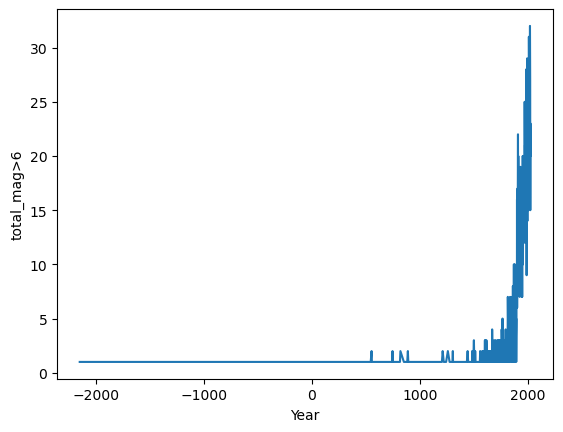

In [32]:
#1.2
#Compute the total number of earthquakes with magnitude larger than 6.0
#(use column Mag as the magnitude) worldwide each year, and then plot the time series. 
group_mag = Sig_Eqs[Sig_Eqs['Mag']>6.0].groupby(['Year']).count()
plt.ylabel('total_mag>6')
group_mag['Mag'].plot()

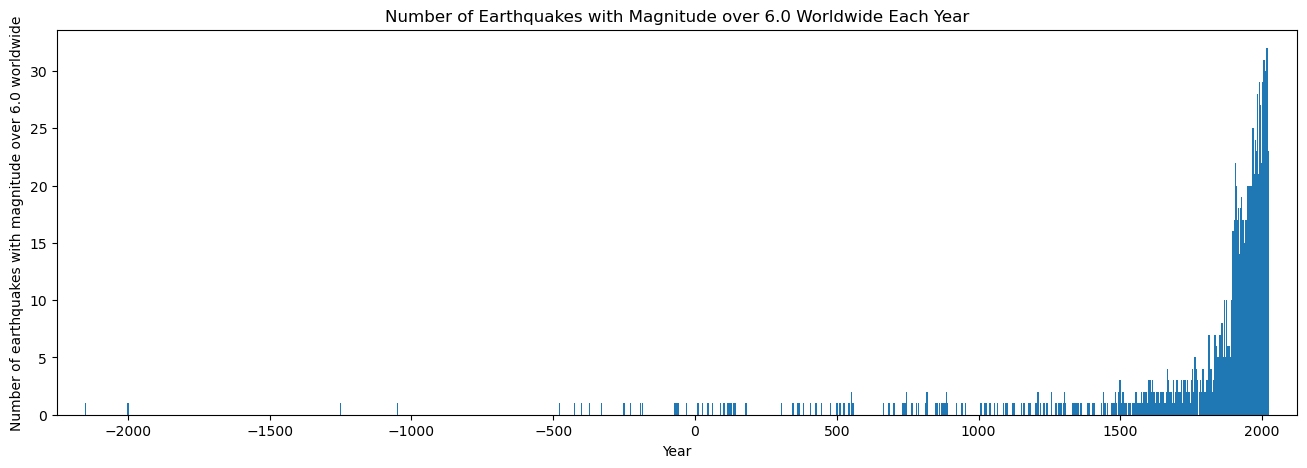

In [29]:
#1.2参考代码
#取Mag大于6的部分，根据年份进行分组，计算每组内有多少个数据
ysigeqs=Sig_Eqs[Sig_Eqs['Mag']>6].groupby(['Year'])['Mag'].count()
yearlist=ysigeqs.index
countlist=ysigeqs
# print(yearlist,countlist)

#设置图像大小，画柱状图，设置x轴范围和x/y坐标轴标签
plt.figure(figsize=(16,5))
plt.bar(yearlist,countlist,width=5)
plt.xlim(yearlist[0]-100,yearlist[-1]+100)
plt.xlabel('Year')
plt.ylabel('Number of earthquakes with magnitude over 6.0 worldwide')
plt.title('Number of Earthquakes with Magnitude over 6.0 Worldwide Each Year')
plt.show()

## 1.3

In [56]:
#1.3
def CountEq_LargestEq(country):
    total = Sig_Eqs[Sig_Eqs['Country']==country]
    num = total[total['Mag']>0].count()['Year']
    num = total[total['Mag']>0].count()['Year']
    temp_total = total.sort_values(by='Mag',ascending = False).head()
    de_total = temp_total.sort_values(by='Year',ascending = False).head()
    de_total = de_total.reset_index(drop = True)
    date = de_total.loc[0,['Year','Mo','Dy','Hr']]
    return(num),(date)
res = pd.DataFrame(columns=['Country','total_mag','date'])
country=[]
for (Country),group in Sig_Eqs[Sig_Eqs['Mag']>0].groupby('Country'):
    country.append(Country)
x=0
for i in country:
    res.loc[str(x)] = [i,CountEq_LargestEq(i)[0],CountEq_LargestEq(i)[1]]
    x+=1
res = res.sort_values(by='total_mag',ascending=False)
res = res.reset_index(drop = True)
res

,Country,total_mag,date
0,CHINA,589,Year 1920.0 Mo 12.0 Dy 16.0 H...
1,JAPAN,351,Year 2011.0 Mo 3.0 Dy 11.0 H...
2,INDONESIA,331,Year 2012.0 Mo 4.0 Dy 11.0 H...
3,IRAN,259,Year 2013.0 Mo 4.0 Dy 16.0 H...
4,USA,223,Year 1965.0 Mo 2.0 Dy 4.0 H...
...,...,...,...
141,NORWAY,1,Year 1819.0 Mo 8.0 Dy 31.0 H...
142,SUDAN,1,Year 1993.0 Mo 8.0 Dy 1.0 H...
143,PALAU,1,Year 1914.0 Mo 10.0 Dy 23.0 H...
144,SIERRA LEONE,1,Year 1795.0 Mo 5.0 Dy 20.0 H...


In [46]:
#1.3参考代码

def CountEq_LargestEq(country):
    #取特定国家的数据，获取长度为地震数量
    eqn=len(Sig_Eqs[Sig_Eqs['Country']==country])
    #取特定国家的数据，根据Mag的值从大到小排序，第一列即震级最大的那次地震
    maMag=Sig_Eqs[Sig_Eqs['Country']==country].sort_values('Mag',ascending=False)
    #取第一列的日期
    yr=int(maMag.iloc[0].Year)
    mo=maMag.iloc[0].Mo
    dy=maMag.iloc[0].Dy
    if np.isnan(mo):
        date=f'year {yr:04}'
        # print(country,date)
    elif np.isnan(dy):
        mo=int(mo)
        date=f'year/month {yr:04d}/{mo:02d}'
        # print(country,date)
    else:
        mo=int(mo)
        dy=int(dy)
        date=f'{yr:04d}/{mo:02d}/{dy:02d}'
    return eqn,date

#去掉nan    
Sig_Eqs1=Sig_Eqs[~pd.isnull(Sig_Eqs['Country'])]
#获取各个国家到list
countrylist=Sig_Eqs1['Country'].unique()
#对每个城市都使用方法，收集到一个DataFrame里
eqnlist=[]
datelist=[]
for country in countrylist:
    eqn,date=CountEq_LargestEq(country)
    eqnlist.append(eqn)
    datelist.append(date)
df1=pd.DataFrame()
df1['country']=countrylist
df1['number Of earthquakes']=eqnlist
df1['the date of the largest earthquake']=datelist
#根据地震数量从大到小排列
df1=df1.sort_values('number Of earthquakes',ascending=False)
df1

,country,number Of earthquakes,the date of the largest earthquake
14,CHINA,620,1668/07/25
33,JAPAN,414,2011/03/11
68,INDONESIA,411,2004/12/26
7,IRAN,384,0856/12/22
9,TURKEY,335,2023/02/06
...,...,...,...
93,NORWAY,1,1819/08/31
126,CENTRAL AFRICAN REPUBLIC,1,1921/09/16
124,PALAU,1,1914/10/23
118,KIRIBATI,1,1905/06/30


=========================================
# 2 Windspeed
10/10  
以时间为x轴画出月平均风速，在报告中回答是否观察到某种趋势；同时在报告中说明你是如何筛选数据的——报告中未说明数据筛选方式，但是代码有体现，下次记得也写到报告里


Text(0.5, 1.0, ' Monthly averaged wind speed')

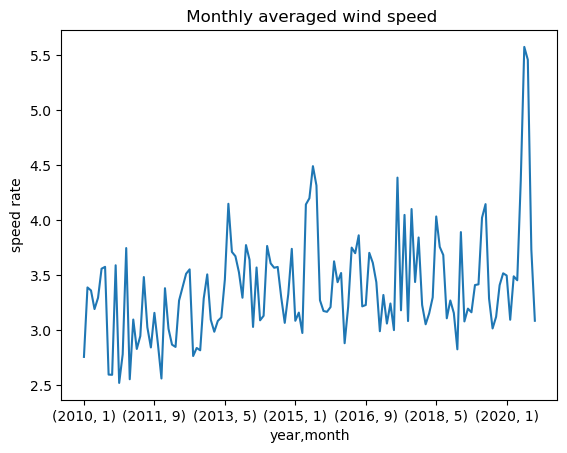

In [59]:
# PS2_2
## 2
Data = pd.read_csv(r"C:\Program1\jupyter_notebook\ese5023\2281305.csv",low_memory=False)
temp = Data.loc[:,['DATE','WND']]
wind = temp['WND'].str.split(',',expand=True)
# temp = pd.DataFrame(temp,columns = ['direction angle','direction quality code','type code','speed rate','speed quality code']
wind
temp['WND'] = wind[3].astype(int)/10
temp['WND'].replace(999.9,np.nan,inplace=True)
temp['year'] = pd.DatetimeIndex(temp.DATE).year
temp['month'] = pd.DatetimeIndex(temp.DATE).month
temp.columns = ['date','speed rate','year','month']
temp.groupby(['year','month'])['speed rate'].mean().plot()
plt.ylabel('speed rate')
plt.title(' Monthly averaged wind speed')

=========================================
# 3 Free Exploration
13/15  
3.1 读取csv/xls/xlsx文件，并清理缺失/低质量数据——清理的数据并不是低质量/残缺数据  4/5  
3.2 画出某个变量的时间序列 5/5  
3.3 对该变量进行至少5种简单的统计检验，并在报告中汇报你的发现——只进行了4种统计检验，且注意报告中图片不完整，没有x轴  4/5


In [63]:
#3
## 3.1
date = pd.read_csv("data.csv")
#删除列
del date["PRCP(Inches)"]
del date["SNOW(Inches)"]

Text(0.5, 0, 'year')

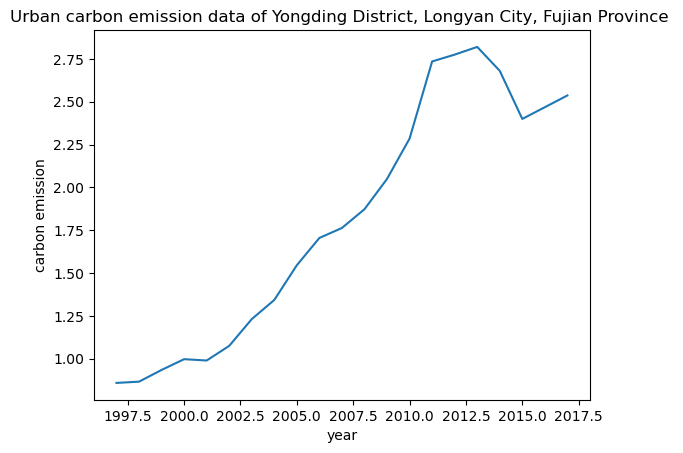

In [64]:
## 3.2  
x = date["Time"]
y = date["carbon emission"]
# Plot a line
plt.plot(x, y)
plt.title('Urban carbon emission data of Yongding District, Longyan City, Fujian Province ')
plt.ylabel('carbon emission')
plt.xlabel('year')

In [19]:
##3.3

In [65]:
date["carbon emission"].max()

2.820306706

In [16]:
date["carbon emission"].max()

2.820306706

In [17]:
date["carbon emission"].mean()

1.8061113682380951

In [18]:
#中间值
date["carbon emission"].median()

1.763043386

In [19]:
date["carbon emission"].sum()

37.928338733